In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_excel(r'/content/SUBJECTS1.xlsx', index_col='Code')
subjects = df.iloc[:,[9,10]]
print(subjects)
dframe = pd.DataFrame(columns=['TotalScore','Year'])
print("Enter the number of years of data")
variable = int(input())
for i in range(0,variable):
    print("Enter Year")
    year = int(input())
    print("Enter your Subjects")
    print("Enter number of subjects")
    n = 3#int(input())
    sub = []
    marks = []
    for i in range (0,n):
        print("Enter Subject Code for Subject "+str(i+1))
        inp = input()
        inp1 = subjects.loc[inp]['Subject']
        sub.append(inp1)
        print("Enter Marks in "+inp1)
        inp2 = int(input())
        marks.append(inp2)    
        creditsub = subjects.loc[inp]['Credit(1-5)'] 
        sub.append(str(creditsub))
        marks.append(inp2*creditsub)
    factors = ['Aptitude', 'Retention', 'CriticalThinking','Attendance','AssignmentSubmission']
    facscore = []
    for var in factors:
      print("Enter marks(out of 10) in " + var)
      facscore.append(int(input()))
    student = pd.DataFrame(columns=factors+sub)
    student.loc[len(student.index)] = facscore+marks
    #formula for calculating score in studies = sum of MarksScored*Credit )/Total number of credits
    # 50% - Studies
    # 50% - Other Factors
    scoresum = sum(marks[1::2])
    totalcredits = 0
    for k in sub[1::2]:
        totalcredits = totalcredits + int(k)
    SUBJECTSCORE = scoresum/totalcredits
    student['SubjectScore'] = SUBJECTSCORE
    FACTORSCORE = sum(facscore)
    student['FactorScore'] = FACTORSCORE
    TOTALSCORE = FACTORSCORE + (SUBJECTSCORE/2)
    student['TotalScore'] = TOTALSCORE
    student['Year'] = year
    print(student)
    TSandY = []
    TSandY.append(TOTALSCORE)
    TSandY.append(int(year))
    dframe.loc[len(dframe.index)] = TSandY

                                Subject  Credit(1-5)
Code                                                
US1101                          Drawing            1
US1102                         Painting            1
US1103                        Sculpture            1
US1104                            Music            1
US1105                            Drama            1
...                                 ...          ...
SNT3108                        Wildlife            3
SNT3109                       Fisheries            3
SNT3110  Fishery science and technology            3
SNT3201             Veterinary medicine            4
SNT3202            Veterinary assisting            4

[175 rows x 2 columns]
Enter the number of years of data
3
Enter Year
2018
Enter your Subjects
Enter number of subjects
Enter Subject Code for Subject 1
US2204
Enter Marks in Archival sciences
67
Enter Subject Code for Subject 2
US1212
Enter Marks in Ethics.
78
Enter Subject Code for Subject 3
ST1301
Enter Ma

In [ ]:
print(dframe)
x = dframe.iloc[:, 0:1].values
y = dframe.iloc[:, 1:].values

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 # fitting the regressor
regressor.fit(dframe[['Year']],dframe.TotalScore)
Y_pred = regressor.predict([[2021]])
print("The Predicted value in 2021 is :")
print(Y_pred)

   TotalScore    Year
0   80.777778  2018.0
1   79.423077  2019.0
2   78.269231  2020.0
The Predicted value in 2021 is :
[78.71773504]


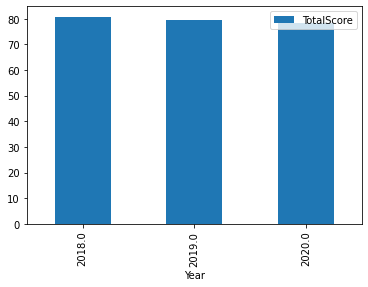

In [ ]:
dframe.plot.bar(x='Year', y='TotalScore')

# New Section